In [1]:
import numpy as np
import pandas as pd
import os
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# Read Dataset
file = pd.read_csv("Data Science Hiring.csv")
file.head(11)

,Candidate ID,Name,Location,Experience,Problem Solving,Machine Learning,Deep Learning,Tools,Programming Skills,Behavioural,Rating,Shortlisted
0,GT11J,Prasanna,Bangalore,9.0,2,10,9,10,3,Excellent,7.166667,Yes
1,TZ58R,Raghav,Hyderabad,1.0,0,8,10,9,8,Bad,6.000000,No
2,GIIB7,John,Chennai,0.0,7,9,7,10,7,Average,6.666667,No
3,E8D26,Manoj,NaN,3.0,5,4,10,9,8,Good,6.500000,No
4,50HVL,Adnan,NaN,10.0,8,7,9,8,8,Bad,8.333333,No
5,NU4TV,Raghav,NaN,NaN,6,1,7,10,5,Good,6.000000,No
6,7R5OT,Andrew,NaN,53.0,9,9,3,10,8,Average,6.666667,No
7,FXN2V,Adnan,NaN,25.0,10,3,5,5,10,Excellent,6.500000,No
8,54IKH,Mithu,NaN,NaN,10,10,6,9,6,Excellent,7.333333,Yes
9,QAVNT,John,NaN,NaN,8,5,8,2,4,Bad,4.833333,No


1. Visualize Data
2. EDA - Feature Engineering
3. Find Numerical and Categorical features
4. Find Missing values
5. Detect Outliers
6. Handle missing values
7. Treat outliers
8. Encode categorical features
9. Normalize data
10. Detect colinearity
11. Handle multi-colinearity
12. Split dataset
13. Train model
14. Predict model
15. Evaluate model
16. Visualize result
17. Model optimization
18. Deployment

<AxesSubplot: >

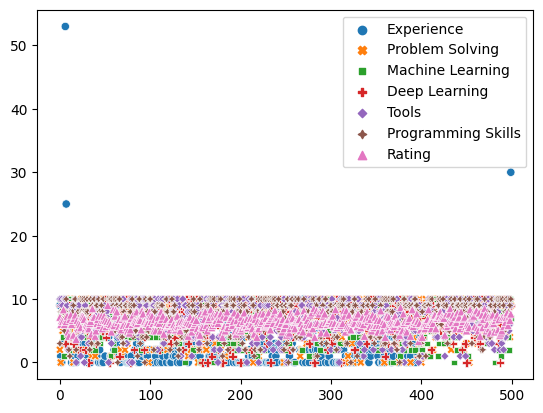

In [3]:
sns.scatterplot(data=file)

Categorical Columns : ['Candidate ID', 'Name', 'Location', 'Behavioural', 'Shortlisted']


Columns with missing data : ['Location', 'Experience', 'Behavioural']




'Outliers:'

6      53.0
7      25.0
499    30.0
Name: Experience, dtype: float64

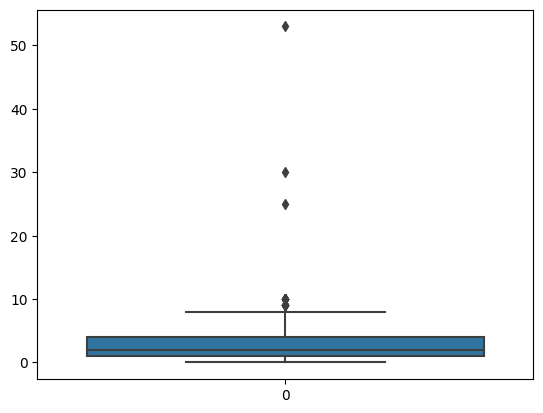

In [4]:

# Exploratory Data Analysis
# Find Categorical and Numerical variables
categorical_columns = [col for col in file.columns if file[col].dtype=="object"]
numerical_columns = [col for col in file.columns if file[col].dtype in ["int64","float64"]]
print("Categorical Columns :", categorical_columns)
print("\n")


# Find Missing data
columns_with_missing_data = [col for col in file.columns if file[col].isnull().any()]
print("Columns with missing data :", columns_with_missing_data)
print("\n")


# Detect Outlier
# Box plot
sns.boxplot(data=file["Experience"])
outliers = np.where(file["Experience"]>10)
display("Outliers:", file.loc[outliers[0],"Experience"])
print("\n")



In [5]:

# Handle missing values
missing_count = file.isnull().sum()
missing_column_count = missing_count[missing_count>0]
print("Dimension:",file.shape)
print("\n")
display("Missing count in each column:", missing_column_count)
print("\n")


Dimension: (500, 12)




'Missing count in each column:'

Location       497
Experience     104
Behavioural     10
dtype: int64

In [6]:


from sklearn.impute import SimpleImputer

# Remove missing data - 
# 1.Drop data
# 2.Build sub model 
# 3.Apply central tendency

# Remove missing data
#file.drop("Location",axis=1,inplace=True)


# Fill missing values with central tendency - Numerical data
impute = SimpleImputer(strategy="mean")
file["Experience"] = impute.fit_transform(file[["Experience"]])
#file["Experience"].fillna(0,inplace=True)
display("Filled missing values in Experience:",file.loc[5:11,"Experience"])
print("\n")


# Fill missing values with central tendency - Categorical data
impute_categorical = SimpleImputer(strategy="most_frequent")
file["Behavioural"] = impute_categorical.fit_transform(file[["Behavioural"]])
display("Filled missing values in Behavioural:",file.loc[495:,"Behavioural"])
print("\n")


# Treating outliers
file.loc[outliers[0][0],"Experience"]=0
display("Removed outliers:",file.loc[5:11,"Experience"])
print("\n")



'Filled missing values in Experience:'

5      3.085859
6     53.000000
7     25.000000
8      3.085859
9      3.085859
10     3.085859
11     3.085859
Name: Experience, dtype: float64

'Filled missing values in Behavioural:'

495    Average
496    Average
497    Average
498    Average
499    Average
Name: Behavioural, dtype: object

'Removed outliers:'

5      3.085859
6      0.000000
7     25.000000
8      3.085859
9      3.085859
10     3.085859
11     3.085859
Name: Experience, dtype: float64

In [7]:

# Encode categorical features
def label_encoder(rank):
    for index in range(len(file)):
        file.loc[index,"Behavioural"] = rank[file.loc[index,"Behavioural"]]

rank = {"Bad":0, "Average": 1, "Good":2, "Excellent": 3}
label_encoder(rank)
file.head()



,Candidate ID,Name,Location,Experience,Problem Solving,Machine Learning,Deep Learning,Tools,Programming Skills,Behavioural,Rating,Shortlisted
0,GT11J,Prasanna,Bangalore,9.0,2,10,9,10,3,3,7.166667,Yes
1,TZ58R,Raghav,Hyderabad,1.0,0,8,10,9,8,0,6.000000,No
2,GIIB7,John,Chennai,0.0,7,9,7,10,7,1,6.666667,No
3,E8D26,Manoj,NaN,3.0,5,4,10,9,8,2,6.500000,No
4,50HVL,Adnan,NaN,10.0,8,7,9,8,8,0,8.333333,No


[0.10025081 0.20287309 0.16359451 0.20864087 0.12810051 0.16559062
 0.03094959]


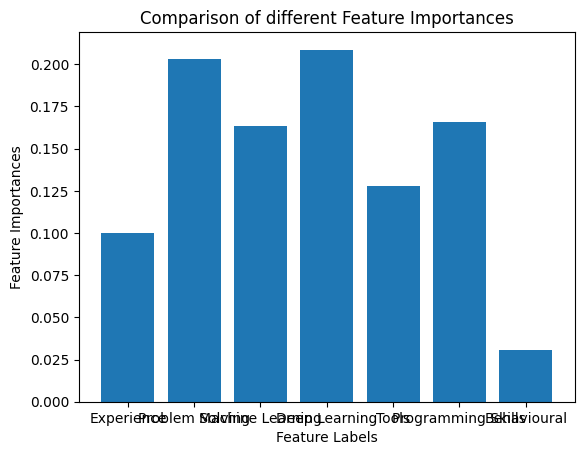

In [38]:

# Normalizing data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
standard_normalization = StandardScaler()
minmax = MinMaxScaler()
columns = ["Experience","Problem Solving","Machine Learning","Deep Learning","Tools","Programming Skills","Behavioural"]

# Min Max Normalization
file[columns] = minmax.fit_transform(file[columns].values)

# Standard Normalization
#file[columns] = standard_normalization.fit_transform(file[columns].values)
file.head(11)

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(file[columns],file["Rating"])
print(selection.feature_importances_)
plt.bar(columns,selection.feature_importances_)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

,Experience,Problem Solving,Machine Learning,Deep Learning,Tools,Programming Skills,Behavioural
Experience,1.000000,0.081870,-0.058810,-0.036484,-0.075066,0.018681,0.055171
Problem Solving,0.081870,1.000000,-0.117638,0.032750,0.006759,-0.001997,-0.073902
Machine Learning,-0.058810,-0.117638,1.000000,0.025463,-0.047934,-0.058777,0.011463
Deep Learning,-0.036484,0.032750,0.025463,1.000000,0.008755,0.003696,-0.009115
Tools,-0.075066,0.006759,-0.047934,0.008755,1.000000,-0.037859,0.056395
Programming Skills,0.018681,-0.001997,-0.058777,0.003696,-0.037859,1.000000,-0.035398
Behavioural,0.055171,-0.073902,0.011463,-0.009115,0.056395,-0.035398,1.000000


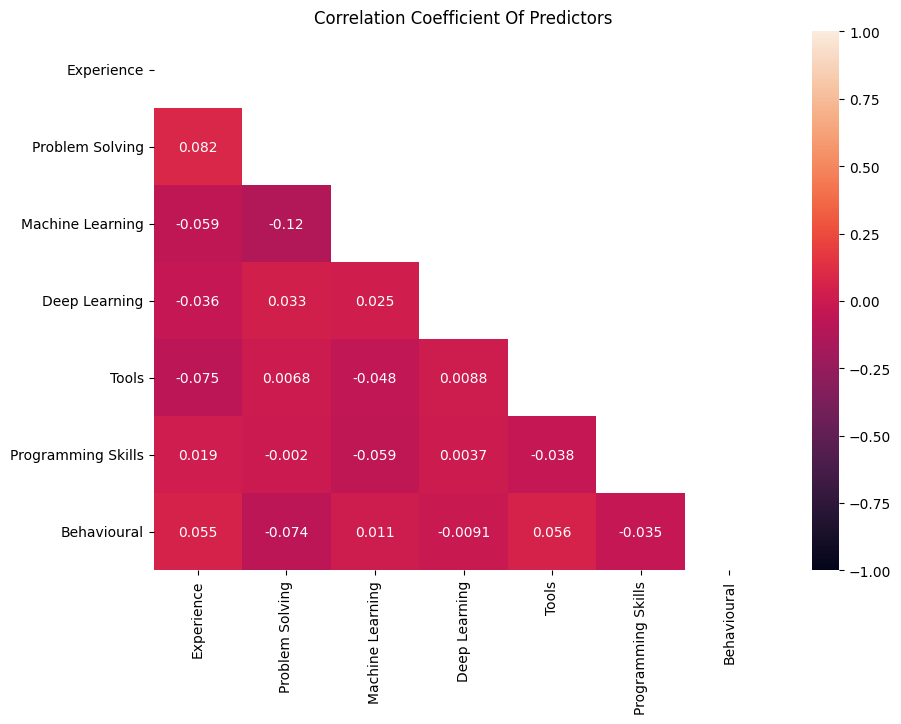

In [9]:


# set figure size
plt.figure(figsize=(10,7))

# Detecting multicolinearity
correlation = file.iloc[:,:-2].corr()
display(correlation)
print("\n")

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Generate heatmap
sns.heatmap(correlation,annot=True,mask=mask,vmin=-1,vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()



In [10]:

import statsmodels.api as sm

# Detecting colinearity with OLS
independent_features = file[columns]
dependent_features = file[["Rating","Shortlisted"]]

# Adding constant
independent_features = sm.add_constant(independent_features)

# Fit model
ols = sm.OLS(dependent_features.iloc[:,0], independent_features).fit()

# OLS Model Summary
ols.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     820.8
Date:                Sat, 19 Nov 2022   Prob (F-statistic):          1.05e-266
Time:                        11:59:24   Log-Likelihood:                -92.050
No. Observations:                 500   AIC:                             200.1
Df Residuals:                     492   BIC:                             233.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2002      0.086      2.331      0.020       0.031       0.369
Experience             3.4823      0.142     24.493      0.000       3.203       3.762
Problem Solving        1.6806      0.048     34.951      0.000       1.586       1.775
Machine Learning       1.6927      0.048     35.338      0.000       1.599       1.787
Deep Learning          1.6698      0.050     33.657      0.000       1.572       1.767
Tools                  1.6067      0.050     32.093      0.000       1.508       1.705
Programming Skills     1.5714      0.051     31.020      0.000       1.472       1.671
Behavioural            0.0275      0.039      0.701      0.484      -0.050       0.105
==============================================================================
Omnibus:                      389.605   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26684.839
Skew:                          -2.753   Prob(JB):                         0.00
Kurtosis:                      38.363   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:

# Split dataset
from sklearn.model_selection import train_test_split,cross_val_score

x_train,x_test,y_train,y_test = train_test_split(independent_features,dependent_features.iloc[:,0],test_size=0.2,random_state=0)

# Shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)


X_train: (400, 8)
X_test: (100, 8)
Y_train: (400,)
Y_test: (100,)


In [17]:

# Evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Adjusted R2
def compute_adjusted_r2(r2,actual: np.ndarray, predicted: np.ndarray, rowcount: np.int, featurecount: np.int):
    return 1-(1-r2)*(rowcount-1)/(rowcount-featurecount)

def metrics_regression(y_test,y_pred):
    r2 = r2_score(y_test,y_pred)*100
    adjusted_r2 = compute_adjusted_r2(r2,y_test,y_pred,len(file),len(independent_features.columns))
    mse = (1- mean_squared_error(y_test,y_pred))*100
    mae = (1 - mean_absolute_error(y_test,y_pred))*100
    return adjusted_r2, r2, mse, mae
    

In [13]:

# Train Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)

# Predict Model
y_linear_pred = linear_regression.predict(x_test)

# Evaluation metrics
adjusted_r2, r2, mse, mae = metrics_regression(y_test,y_linear_pred)
print(" Adjusted R2 Score :", adjusted_r2)
print(" R2 Score :", r2)
print(" MSE Score :", mse)
print(" MAE Score :", mae)


 Adjusted R2 Score : 95.49564145127462
 R2 Score : 94.1700512906355
 MSE Score : 93.82875637680343
 MAE Score : 82.25530697344685


Text(0.5, 1.0, 'Linear Regression Results')

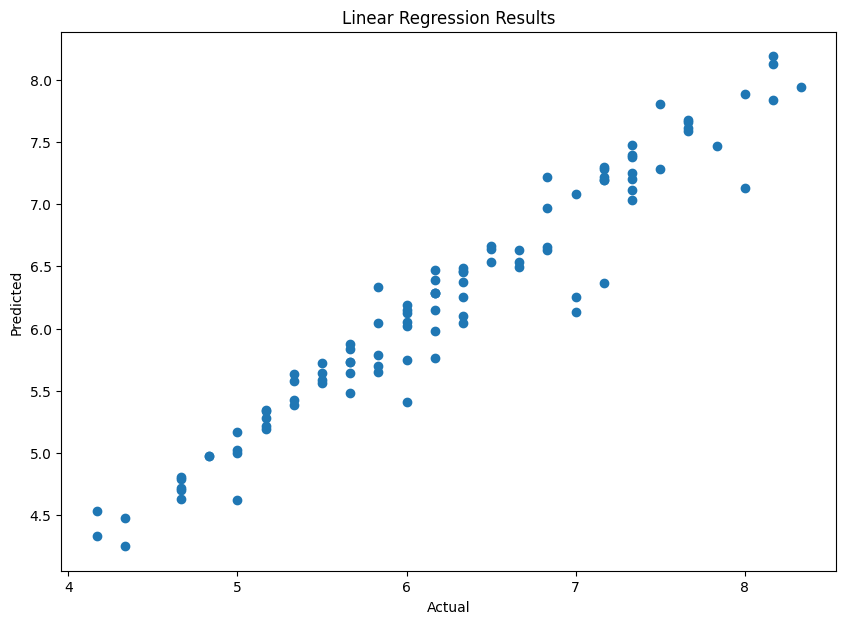

In [14]:

# set figure size
plt.figure(figsize=(10,7))

# Visualize results
plt.scatter(y_test,y_linear_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Linear Regression Results")
#sns.regplot(x=y_test,y=y_linear_pred,color ='skyblue')


In [15]:

# Results
linear_pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_linear_pred,'Difference':np.abs(y_test-y_linear_pred)})
linear_pred_df.head()


,Actual Value,Predicted Value,Difference
90,5.166667,5.284893,0.118226
254,4.666667,4.703874,0.037208
283,6.166667,6.285469,0.118803
445,6.000000,5.412554,0.587446
461,8.166667,7.832482,0.334184


In [32]:

# Pipeline

from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

# Read CSV
file_pipeline = pd.read_csv("Data Science Hiring.csv")

# Features
independent_features = file_pipeline[columns]
dependent_features = file_pipeline.Rating

# Split data
x_train,x_test,y_train,y_test = train_test_split(independent_features,dependent_features,test_size=0.2,random_state=0)


# Pipeline
# Preprocess
preprocess_numerical = Pipeline(steps=[("impute",SimpleImputer(strategy="mean")),("outliers",minmax)])
preprocess_categorical = Pipeline(steps=[("impute",SimpleImputer(strategy="most_frequent")),("encoder",OneHotEncoder(handle_unknown="ignore"))])
preprocessor = ColumnTransformer(transformers=[("numerical",preprocess_numerical,numerical_columns[:-1]),("categorical",preprocess_categorical,["Behavioural"])])

# Model
linear_regression = LinearRegression()
elastic_net = ElasticNet(alpha=1)
svr = SVR(kernel = 'linear')
random_forest_regressor = RandomForestRegressor(n_estimators = 10, max_depth = 20, random_state=0)
xgb_regressor = XGBRegressor(n_estimators=10, max_depth=20, learning_rate=0.05, random_state=0)

# Bundle process
pipeline = Pipeline(steps=[("preprocess",preprocessor),("model",linear_regression)])

# Preprocess test data for evaluation set
preprocessor.fit(x_train)
x_test_copy = preprocessor.transform(x_test)

# Train
pipeline.fit(x_train,y_train)
#pipeline.fit(x_train,y_train,model__early_stopping_rounds=5,model__eval_set=[(x_test_copy[:,:-3],y_test)])

# Dumping pickle
import pickle
pickle.dump(pipeline,open('model.pkl','wb'))

# Predict
model = pickle.load(open('model.pkl','rb'))
print(x_test)
y_pred = pipeline.predict(x_test)

# Cross Validation
#score = -1*cross_val_score(pipeline,independent_features,dependent_features,cv=2,scoring="neg_mean_absolute_error")
#print("scores",score)

mean_squared_error = np.mean((y_pred - y_test)**2)
print("Mean Squared Error on test set:", mean_squared_error)





ValueError: could not convert string to float: 'Excellent'

 Adjusted R2 Score : 91.72157079854865
 R2 Score : 90.63073026790478
 MSE Score : 90.08223760265224
 MAE Score : 74.41923014756252


<AxesSubplot: title={'center': 'Results'}, xlabel='Rating', ylabel='Predicted'>

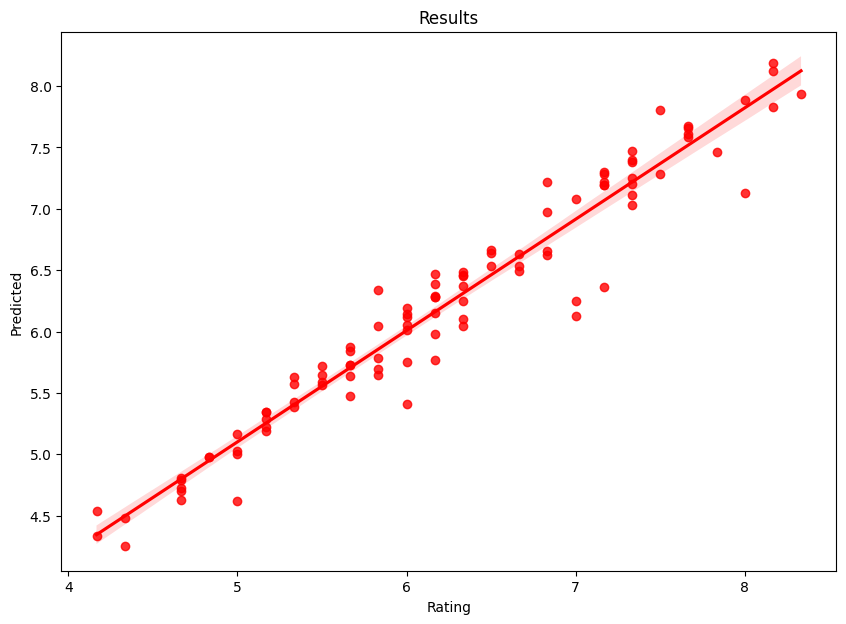

In [18]:

# Evaluation metrics
adjusted_r2, r2, mse, mae = metrics_regression(y_test,y_pred)
print(" Adjusted R2 Score :", adjusted_r2)
print(" R2 Score :", r2)
print(" MSE Score :", mse)
print(" MAE Score :", mae)

# set figure size
plt.figure(figsize=(10,7))

# Visualize results
#plt.scatter(y_test,y_linear_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Results")
sns.regplot(x=y_test,y=y_linear_pred,color ='red')



In [29]:
a = ["1","2","c"]
b = [int(a[x]) for x in range(len(a)-1)]
b

[1, 2]

In [19]:

from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

# Classification metrics
def metrics_classification (y_test,y_pred):
    accuracy = accuracy_score (y_test,y_pred)*100
    c_matrix = confusion_matrix (y_test,y_pred)
    p_score = precision_score (y_test,y_pred,pos_label="Yes")*100
    r_score = recall_score (y_test,y_pred,pos_label="Yes")*100
    f_score = f1_score (y_test,y_pred,pos_label="Yes")*100
    return accuracy,c_matrix,p_score,r_score,f_score


In [20]:

# Classification

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Features
independent_features = file_pipeline[columns]
dependent_features = file_pipeline.Shortlisted

# Split data
x_train,x_test,y_train,y_test = train_test_split(independent_features,dependent_features,test_size=0.2,random_state=0)

# Pipeline
# Preprocess
preprocess_numerical = Pipeline(steps=[("impute",SimpleImputer(strategy="mean")),("outliers",minmax)])
preprocess_categorical = Pipeline(steps=[("impute",SimpleImputer(strategy="most_frequent")),("encoder",OneHotEncoder(handle_unknown="ignore"))])
preprocessor = ColumnTransformer(transformers=[("numerical",preprocess_numerical,numerical_columns[:-1]),("categorical",preprocess_categorical,["Behavioural"])])

# Model
logistic_regression = LogisticRegression()
random_forest_classifier = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=0)
xgboost_classifier = XGBClassifier(objective = 'binary:logistic', eval_metric="error", random_state=0)

# Bundle process
pipeline = Pipeline(steps=[("preprocess",preprocessor),("model", xgboost_classifier)])

# Preprocess test data for evaluation set
preprocessor.fit(x_train)
x_test_copy = preprocessor.transform(x_test)

# Train model
pipeline.fit(x_train,y_train,model__early_stopping_rounds=5,model__eval_set=[(x_test_copy[:,:-3],y_test)])

# Predict
y_pred = pipeline.predict(x_test)

# Results
classification_pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
classification_pred_df.head()


[0]	validation_0-error:0.22000
[1]	validation_0-error:0.21000
[2]	validation_0-error:0.19000
[3]	validation_0-error:0.17000
[4]	validation_0-error:0.18000
[5]	validation_0-error:0.17000
[6]	validation_0-error:0.18000
[7]	validation_0-error:0.17000
[8]	validation_0-error:0.15000
[9]	validation_0-error:0.15000
[10]	validation_0-error:0.14000
[11]	validation_0-error:0.15000
[12]	validation_0-error:0.14000
[13]	validation_0-error:0.12000
[14]	validation_0-error:0.12000
[15]	validation_0-error:0.12000
[16]	validation_0-error:0.12000
[17]	validation_0-error:0.12000
[18]	validation_0-error:0.12000


,Actual Value,Predicted Value
90,No,No
254,No,No
283,No,No
445,No,No
461,Yes,Yes


Confusion Matrix:
 [[72  4]
 [ 5 19]]


 Accuracy : 91.0
 Precision Score : 82.6086956521739
 Recall Score : 79.16666666666666
 F1 Score : 80.85106382978724


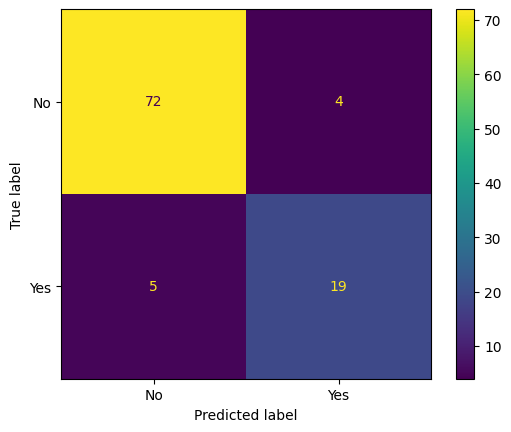

In [21]:

# Metrics
accuracy,c_matrix,p_score,r_score,f_score = metrics_classification(y_test,y_pred)
print("Confusion Matrix:\n",c_matrix)
print("\n")
print(" Accuracy :", accuracy)
print(" Precision Score :", p_score)
print(" Recall Score :", r_score)
print(" F1 Score :", f_score)
plot_confusion_matrix(pipeline, x_test, y_test)
plt.show()


AUC for classifier is 0.9473684210526315


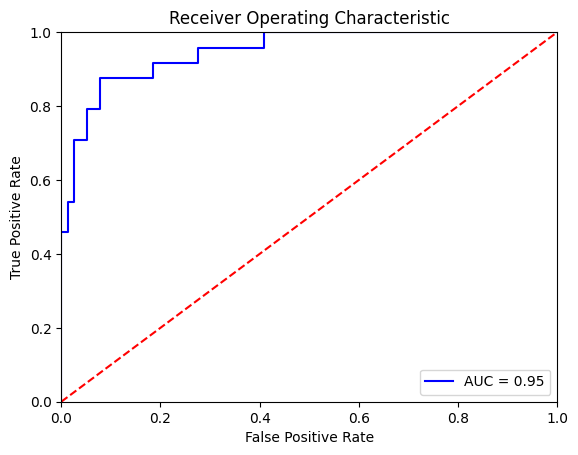

In [22]:


from sklearn.metrics import roc_curve, auc, roc_auc_score

# ROC-AUC curve
class_probabilities = pipeline.predict_proba(x_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds,pos_label="Yes")
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for classifier is {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [24]:

from sklearn.model_selection import GridSearchCV
    
# GridSearchCV
parameters = {
    'model__max_depth': [2, 10, 5, 20],
    'model__n_estimators': [10, 50, 100, 200],
    'model__learning_rate': [0.1, 0.01, 0.05],
    "model__early_stopping_rounds": [10]
}

grid_search_cv = GridSearchCV(pipeline,param_grid = parameters, scoring = "roc_auc", cv = 5,verbose=False)
grid_search_cv.fit(x_train,y_train)

# Best Parameters
display("Best Parameters:",grid_search_cv.best_estimator_)
best_estimator = grid_search_cv.best_estimator_

# Train with best parameters
best_estimator.fit(x_train,y_train)

# Predict
y_pred_gridSearchCV = best_estimator.predict(x_test)



[12:11:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:11:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:11:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" 

[12:11:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:11:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:11:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" 

[12:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" 

[12:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" 

[12:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" 

[12:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" 

[12:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" 

[12:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" 

[12:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:12:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" 

[12:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" 

[12:12:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:12:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:12:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" 

[12:12:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:12:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:12:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" 

[12:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




'Best Parameters:'

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('outliers',
                                                                   MinMaxScaler())]),
                                                  ['Experience',
                                                   'Problem Solving',
                                                   'Machine Learning',
                                                   'Deep Learning', 'Tools',
                                                   'Programming Skills']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(h...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=4, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

[12:12:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Confusion Matrix:
 [[74  2]
 [ 3 21]]


 Accuracy : 95.0
 Precision Score : 91.30434782608695
 Recall Score : 87.5
 F1 Score : 89.36170212765957


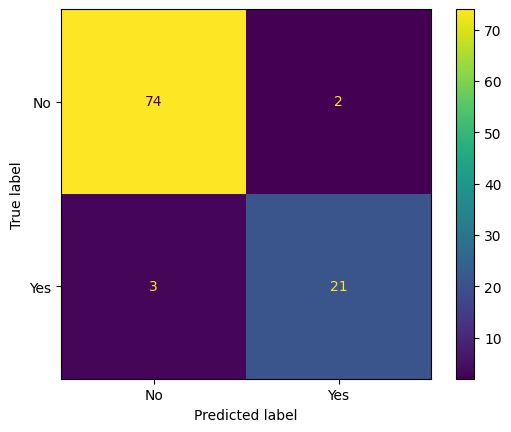

In [29]:

# Metrics
accuracy,c_matrix,p_score,r_score,f_score = metrics_classification(y_test,y_pred_gridSearchCV)
print("Confusion Matrix:\n",c_matrix)
print("\n")
print(" Accuracy :", accuracy)
print(" Precision Score :", p_score)
print(" Recall Score :", r_score)
print(" F1 Score :", f_score)
plot_confusion_matrix(best_estimator, x_test, y_test)
plt.show()
